In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
#!/bin/bash
!kaggle datasets download bhavikjikadara/dog-and-cat-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/bhavikjikadara/dog-and-cat-classification-dataset
License(s): apache-2.0
 97% 751M/775M [00:05<00:00, 139MB/s]
100% 775M/775M [00:05<00:00, 149MB/s]


In [ ]:
!unzip dog-and-cat-classification-dataset.zip -d dataset/

Streaming output truncated to the last 5000 lines.
  inflating: dataset/PetImages/Dog/5499.jpg  
  inflating: dataset/PetImages/Dog/55.jpg  
  inflating: dataset/PetImages/Dog/550.jpg  
  inflating: dataset/PetImages/Dog/5500.jpg  
  inflating: dataset/PetImages/Dog/5501.jpg  
  inflating: dataset/PetImages/Dog/5502.jpg  
  inflating: dataset/PetImages/Dog/5503.jpg  
  inflating: dataset/PetImages/Dog/5504.jpg  
  inflating: dataset/PetImages/Dog/5505.jpg  
  inflating: dataset/PetImages/Dog/5506.jpg  
  inflating: dataset/PetImages/Dog/5507.jpg  
  inflating: dataset/PetImages/Dog/5508.jpg  
  inflating: dataset/PetImages/Dog/5509.jpg  
  inflating: dataset/PetImages/Dog/551.jpg  
  inflating: dataset/PetImages/Dog/5510.jpg  
  inflating: dataset/PetImages/Dog/5511.jpg  
  inflating: dataset/PetImages/Dog/5512.jpg  
  inflating: dataset/PetImages/Dog/5513.jpg  
  inflating: dataset/PetImages/Dog/5514.jpg  
  inflating: dataset/PetImages/Dog/5515.jpg  
  inflating: dataset/PetImages/Do

# ***CAT vs DOG IN CNN***

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras import Sequential

### **GENERATORS**
A generator in Keras is a Python object that yields batches of data (images + labels) during training instead of loading everything into memory at once.

This is especially useful for large datasets (like image datasets with thousands of photos).

In [ ]:
import os, shutil
import numpy as np

# Paths
base_dir = "/content/dataset/PetImages"
train_dir = "/content/dataset/train"
test_dir = "/content/dataset/test"

# Create folders
for folder in [train_dir, test_dir]:
    os.makedirs(os.path.join(folder, "cats"), exist_ok=True)
    os.makedirs(os.path.join(folder, "dogs"), exist_ok=True)

# Parameters
test_split = 0.2  # 20% test data

# Function to split data
def split_data(source, train, test, split_size):
    files = os.listdir(source)
    np.random.shuffle(files)
    split_point = int(len(files) * (1 - split_size))
    train_files = files[:split_point]
    test_files = files[split_point:]

    for f in train_files:
        shutil.copy(os.path.join(source, f), os.path.join(train, f))
    for f in test_files:
        shutil.copy(os.path.join(source, f), os.path.join(test, f))

# Apply split for cats and dogs
split_data("/content/dataset/PetImages/Cat", "/content/dataset/train/cats", "/content/dataset/test/cats", test_split)
split_data("/content/dataset/PetImages/Dog", "/content/dataset/train/dogs", "/content/dataset/test/dogs", test_split)


In [ ]:
# generators

# for training data
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)


# for testing data
test_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 23960 files belonging to 2 classes.
Found 8962 files belonging to 2 classes.


***What is tf.cast?***

tf.cast is a TensorFlow function that changes the data type (dtype) of a tensor.

👉 Think of it like telling TensorFlow:

“Hey, take this tensor and represent it as float32 (or int32, etc.), even if it was something else before.”

In [ ]:
@tf.function
def process(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label

train_dataset = train_dataset.map(process).apply(tf.data.experimental.ignore_errors())
test_dataset  = test_dataset.map(process).apply(tf.data.experimental.ignore_errors())

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))
model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer = 'adam' , loss = "binary_crossentropy" , metrics= ["accuracy"])

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data = test_dataset)

Epoch 1/10
 56/749 ━━━━━━━━━━━━━━━━━━━━ 45s 66ms/step - accuracy: 0.5260 - loss: 0.7572

InvalidArgumentError: Graph execution error:

Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
Detected at node decode_image/DecodeImage defined at (most recent call last):
<stack traces unavailable>
2 root error(s) found.
  (0) INVALID_ARGUMENT:  Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
	 [[IteratorGetNext/_2]]
  (1) INVALID_ARGUMENT:  Number of channels inherent in the image must be 1, 3 or 4, was 2
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]]
0 successful operations.
0 derived errors ignored. [Op:__inference_multi_step_on_iterator_83387]

To overcome overfit we can do
1. more data
2. data augmentation
3. l1, l2 regularization
4. dropouts
5. batch normalization
6. reduce complexity

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from keras import Sequential

# --- Dataset ---
train_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/dataset/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    color_mode="rgb"
)

test_dataset = keras.utils.image_dataset_from_directory(
    directory='/content/dataset/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    color_mode="rgb"
)

# Normalize
@tf.function
def process(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label

train_dataset = train_dataset.map(process).apply(tf.data.experimental.ignore_errors())
test_dataset  = test_dataset.map(process).apply(tf.data.experimental.ignore_errors())

# --- Model ---
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.1),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)


Found 23960 files belonging to 2 classes.
Found 8962 files belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


    742/Unknown 68s 83ms/step - accuracy: 0.5738 - loss: 2.1690

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


742/742 ━━━━━━━━━━━━━━━━━━━━ 81s 100ms/step - accuracy: 0.5739 - loss: 2.1676 - val_accuracy: 0.6792 - val_loss: 0.6057
Epoch 2/10
742/742 ━━━━━━━━━━━━━━━━━━━━ 70s 94ms/step - accuracy: 0.6796 - loss: 0.6145 - val_accuracy: 0.5925 - val_loss: 1.4072
Epoch 3/10
742/742 ━━━━━━━━━━━━━━━━━━━━ 70s 94ms/step - accuracy: 0.7231 - loss: 0.5615 - val_accuracy: 0.6930 - val_loss: 0.5666
Epoch 4/10
742/742 ━━━━━━━━━━━━━━━━━━━━ 70s 94ms/step - accuracy: 0.7595 - loss: 0.5075 - val_accuracy: 0.7722 - val_loss: 0.4810
Epoch 5/10
742/742 ━━━━━━━━━━━━━━━━━━━━ 74s 100ms/step - accuracy: 0.7817 - loss: 0.4722 - val_accuracy: 0.5518 - val_loss: 0.7975
Epoch 6/10
742/742 ━━━━━━━━━━━━━━━━━━━━ 72s 97ms/step - accuracy: 0.8024 - loss: 0.4380 - val_accuracy: 0.8277 - val_loss: 0.3951
Epoch 7/10
742/742 ━━━━━━━━━━━━━━━━━━━━ 70s 95ms/step - accuracy: 0.8339 - loss: 0.3824 - val_accuracy: 0.8202 - val_loss: 0.3864
Epoch 8/10
742/742 ━━━━━━━━━━━━━━━━━━━━ 70s 95ms/step - accuracy: 0.8532 - loss: 0.3389 - val_accur

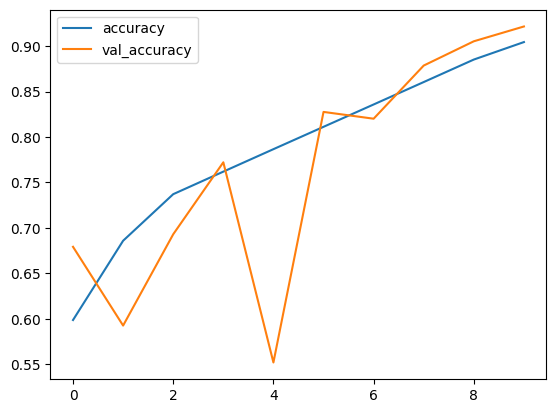

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

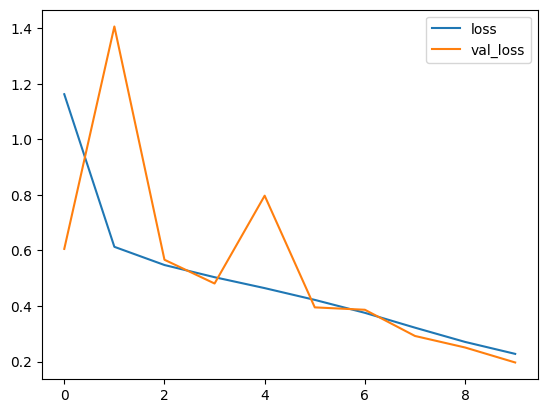

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

#Predicting the class by giving a random image of cat/Dog Downloaded from google


Saving dog5.jpg to dog5.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


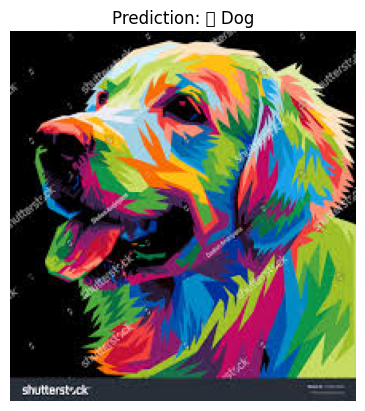

In [ ]:
from google.colab import files
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# --- Upload image from device ---
uploaded = files.upload()

# Take the first uploaded file
img_path = list(uploaded.keys())[0]

# --- Preprocess image (same as training) ---
def prepare_image(file_path):
    img = keras.preprocessing.image.load_img(file_path, target_size=(256, 256))  # resize
    img_array = keras.preprocessing.image.img_to_array(img)  # to numpy array
    img_array = img_array / 255.0                           # normalize
    img_array = np.expand_dims(img_array, axis=0)           # add batch dimension
    return img_array

# Prepare uploaded image
img_array = prepare_image(img_path)

# --- Prediction ---
prediction = model.predict(img_array)

pred_class = "🐶 Dog" if prediction[0][0] > 0.5 else "🐱 Cat"

# --- Display image with prediction ---
img = plt.imread(img_path)
plt.imshow(img)
plt.axis("off")
plt.title(f"Prediction: {pred_class}")
plt.show()


## SO, FOR NOW, WE USE `dropouts` AND `batch normalization` TO REDUCED OVERFITTING